In [1]:
import os     #使用操作系統相關功能的模塊
import numpy as np          #Python進行科學計算的基礎包
import pandas as pd
from keras.utils import np_utils
import warnings
import facerecognition as fr

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
fr.viewversion()

platform          : win32
conda             : 4.5.5
jupyter notebook  : 5.0.0
Python            : 3.6.3 
numpy             : 1.13.3
pandas            : 0.20.3
matplotlib        : 2.2.2
sklearn           : 0.19.1
tensorflow        : 1.2.1
keras             : 2.1.3
cv2               : 3.4.0
dlib              : 19.6.1


In [3]:
fr.extractface(sample='sample0_face', number=100)

已擷取100張人臉圖片
已擷取100張人臉樣本


In [4]:
fr.extractface(sample='sample1_face', number=100)

已擷取100張人臉圖片
已擷取100張人臉樣本


In [5]:
fr.extractface(sample='sample2_face', number=100)

已擷取100張人臉圖片
已擷取100張人臉樣本


In [6]:
# 寫入sample_name.txt

In [7]:
name_dict, number_of_samples=fr.getnamedict()

In [8]:
fr.train_validation_test_split()

sample0_train_validation: 80 	sample0_test: 20
sample1_train_validation: 80 	sample1_test: 20
sample2_train_validation: 80 	sample2_test: 20
sample0_train: 64 	sample0_validation: 16
sample1_train: 64 	sample1_validation: 16
sample2_train: 64 	sample2_validation: 16


# 資料增強

In [9]:
fr.dataAugmentation(numbers=10)

sample0_face已增加了10筆資料
sample0_face已增加了20筆資料
sample0_face已增加了30筆資料
sample0_face已增加了40筆資料
sample0_face已增加了50筆資料
sample0_face已增加了60筆資料
sample0_face已增加了70筆資料
sample0_face已增加了80筆資料
sample0_face已增加了90筆資料
sample0_face已增加了100筆資料
sample0_face已增加了110筆資料
sample0_face已增加了120筆資料
sample0_face已增加了130筆資料
sample0_face已增加了140筆資料
sample0_face已增加了150筆資料
sample0_face已增加了160筆資料
sample0_face已增加了170筆資料
sample0_face已增加了180筆資料
sample0_face已增加了190筆資料
sample0_face已增加了200筆資料
sample0_face已增加了210筆資料
sample0_face已增加了220筆資料
sample0_face已增加了230筆資料
sample0_face已增加了240筆資料
sample0_face已增加了250筆資料
sample0_face已增加了260筆資料
sample0_face已增加了270筆資料
sample0_face已增加了280筆資料
sample0_face已增加了290筆資料
sample0_face已增加了300筆資料
sample0_face已增加了310筆資料
sample0_face已增加了320筆資料
sample0_face已增加了330筆資料
sample0_face已增加了340筆資料
sample0_face已增加了350筆資料
sample0_face已增加了360筆資料
sample0_face已增加了370筆資料
sample0_face已增加了380筆資料
sample0_face已增加了390筆資料
sample0_face已增加了400筆資料
sample0_face已增加了410筆資料
sample0_face已增加了420筆資料
sample0_face已增加了430筆資料
sample0_face已增加了440筆

In [10]:
# 複製到sample0_face後刪除sample0_face+

# 資料預處理

In [11]:
target_size = 64

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) 
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory('validation/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')

Found 1920 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


# 建立模型

In [13]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential() # Initialising the CNN
model.add(Conv2D(32, (3, 3), input_shape = (target_size, target_size, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Conv2D(32, (3, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Flatten()) # Flattening
model.add(Dense(units = 128, activation = 'relu')) # Fully Connected
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = number_of_samples, activation = 'softmax'))
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

# 訓練模型

In [14]:
from keras.models import load_model

try:
    model = load_model('SaveModel/facerecognition.hd5')
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [15]:
# https://keras-cn.readthedocs.io/en/latest/models/model/

In [16]:
history = model.fit_generator(training_set,
                              nb_epoch=20,
                              nb_val_samples=30,
                              steps_per_epoch = 30,
                              shuffle=True,
                              verbose = 1,
                              validation_data = validation_set)

Epoch 1/20
30/30 [==============================] - 3s 94ms/step - loss: 1.1120 - acc: 0.3667 - val_loss: 1.0949 - val_acc: 0.4792
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 1.0949 - acc: 0.3533 - val_loss: 1.0990 - val_acc: 0.3333
Epoch 3/20
30/30 [==============================] - 2s 68ms/step - loss: 1.1006 - acc: 0.3967 - val_loss: 1.0663 - val_acc: 0.7500
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 1.0847 - acc: 0.3933 - val_loss: 1.1019 - val_acc: 0.3333
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 1.0941 - acc: 0.3633 - val_loss: 1.0815 - val_acc: 0.2917
Epoch 6/20
30/30 [==============================] - 2s 69ms/step - loss: 1.0395 - acc: 0.4633 - val_loss: 1.1580 - val_acc: 0.3333
Epoch 7/20
30/30 [==============================] - 2s 68ms/step - loss: 0.9745 - acc: 0.5567 - val_loss: 0.8212 - val_acc: 0.5833
Epoch 8/20
30/30 [==============================] - 2s 68ms/step - loss: 0.9610 - a

# 驗證曲線

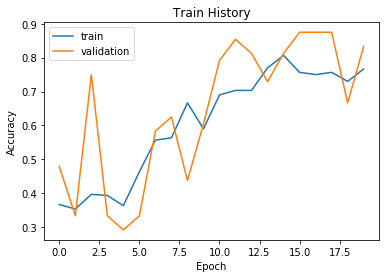

In [17]:
fr.show_acc_history(history=history)

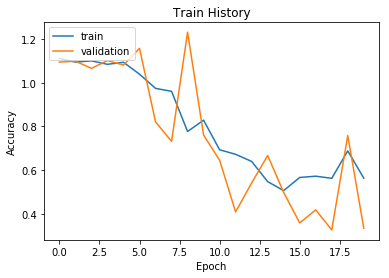

In [18]:
fr.show_loss_history(history=history)

# 模型預測

In [20]:
from keras.preprocessing import image

test_image = np.expand_dims(image.img_to_array(image.load_img(r'sample0_face\sample0_0.jpg', target_size= (64,64))), 0)/255

In [21]:
model.predict(test_image)[0]

array([ 0.4967705 ,  0.00996247,  0.49326697], dtype=float32)

In [22]:
model.predict_proba(test_image)[0]

array([ 0.4967705 ,  0.00996247,  0.49326697], dtype=float32)

In [23]:
model.predict_classes(test_image)[0]

0

In [24]:
model.predict(test_image)[0][model.predict_classes(test_image)[0]]

0.4967705

In [25]:
name_dict['sample'+str(model.predict_classes(test_image)[0])] 

'normal'

# 評估模型

In [26]:
testset_path = []   #testset_path為所有testset圖片路徑的list
for i in os.listdir('test'):
    for j in os.listdir('test/'+i):
        testset_path.append('test/'+i+'/'+j)  

x_test_image = []
for path in testset_path:
    x_test_image.append(image.img_to_array(image.load_img(path, target_size= (64,64))))
x_test_image = np.array(x_test_image)/225

y_test_label = test_set.classes
y_Test_OneHot = np_utils.to_categorical(y_test_label)

test = []
for x, y, z in zip(x_test_image, y_test_label, y_Test_OneHot):
    test.append([x, y, z])

x_test_image = []
y_test_label = []
y_Test_OneHot = []
for i in test:
    x_test_image.append(i[0])
    y_test_label.append(i[1])
    y_Test_OneHot.append(i[2])
x_test_image = np.array(x_test_image)
y_test_label = np.array(y_test_label)
y_Test_OneHot = np.array(y_Test_OneHot)

prediction = model.predict_classes(x_test_image)               #預測
scores = model.evaluate(x_test_image, y_Test_OneHot, verbose=0)  #評估
scores[1]

0.899999988079071

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


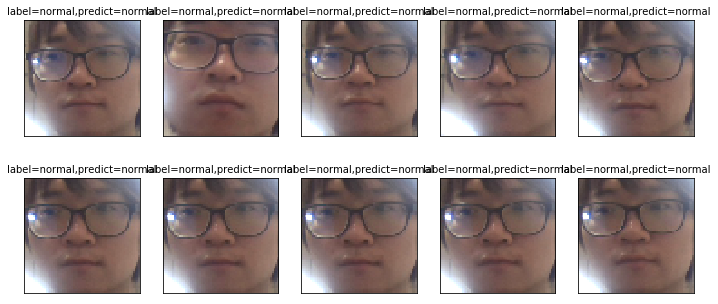

In [27]:
fr.plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10)

# 混淆矩陣

In [28]:
y_test_label_names = np.ndarray((len(y_test_label),),dtype=object)
prediction_names = np.ndarray((len(prediction),),dtype=object)
for i, j, k in zip(y_test_label, prediction, range(len(y_test_label))):
    y_test_label_names[k] = name_dict['sample'+str(i)]
    prediction_names[k] = name_dict['sample'+str(j)]

In [29]:
pd.crosstab(y_test_label_names,prediction_names,rownames=['label'],colnames=['predict'])

predict,angry,normal,smile
label,,,
angry,18,2,0
normal,1,19,0
smile,0,3,17


# 儲存模型

In [30]:
if not os.path.exists('SaveModel'):
    os.mkdir('SaveModel')
# classifier.save_weights("SaveModel/face.h5")
model.save('SaveModel/facerecognition.hd5')
print("Saved model to disk")

Saved model to disk


# 人臉辨識

In [31]:
fr.facerecognition(threshold=0.5)